# TP1 - Análisis con enfoque a la columna 'keyword'

> #### importación general de librerías y de visualización (matplotlib y seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
sns.set (style = 'darkgrid')

> #### Leemos el dataFrame

In [3]:
df = pd.read_csv('../train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


> #### Vemos la cantidad de registros y caracteristicas generales de las columnas numericas

In [4]:
df.shape

(7613, 5)

In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


> #### Nos enfocamos en la columna 'keyword'
* Vemos la cantidad de nulos de esta columna
* Los primeros 30 valores
* La cantidad de valores distintos que obtiene esta columna

In [6]:
df.keyword.isna().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [7]:
df.keyword.unique()[:30]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging'],
      dtype=object)

In [8]:
df.keyword.unique().size

222

> #### Procedemos a crearnos un dataFrame aparte con este universo
> * <i>Nos sacamos de encima los nulos, el cual vimos anteriormente que eran sólo 61 items</i>
> * <i>Corregimos algunos datos, observando previamente la presencia del caracter '%20' el cual representa un espacio</i>

In [9]:
dfK = df.dropna(subset=['keyword']).copy()
dfK.shape

(7552, 5)

In [10]:
dfK['keyword'] = dfK['keyword'].apply(lambda x: x.replace('%20', '_'))
dfK.keyword.unique()[:30]

array(['ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags'],
      dtype=object)

> #### Creamos un gráfico para ver las 30 primeras 'keyword' por cantidad de Tweets

Text(0, 0.5, 'Keyword')

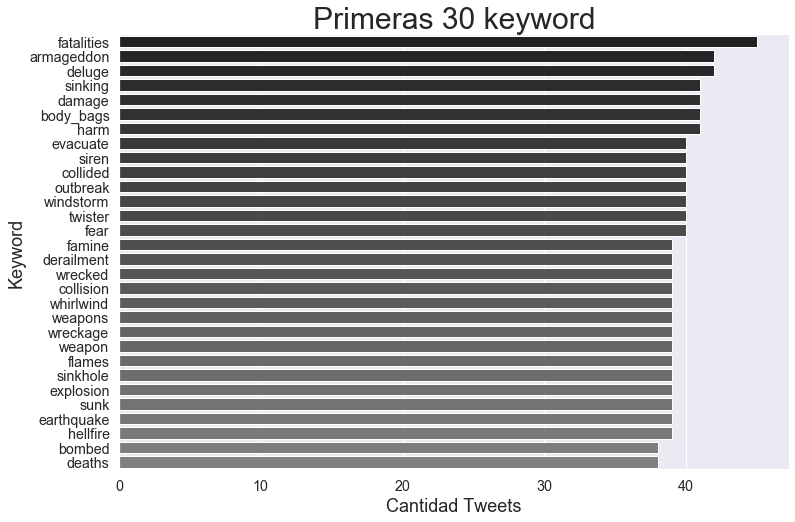

In [59]:
#s = dfK.keyword.value_counts()
s = dfK.keyword.value_counts().head(30)
p = pd.DataFrame({'keyword': s.index, 'cant': s.values })

plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.3)
g = sns.barplot(x='cant', y='keyword', data=p, orient="h", palette=sns.dark_palette("gray", 30))
g.set_title("Primeras 30 keyword", fontsize=30)
g.set_xlabel("Cantidad Tweets", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)
#show_values_on_bars(g, "h")

> #### Creamos un grafico para ver las keyword mas frecuentes en el universo de Tweet verdaderos

<Figure size 432x288 with 0 Axes>

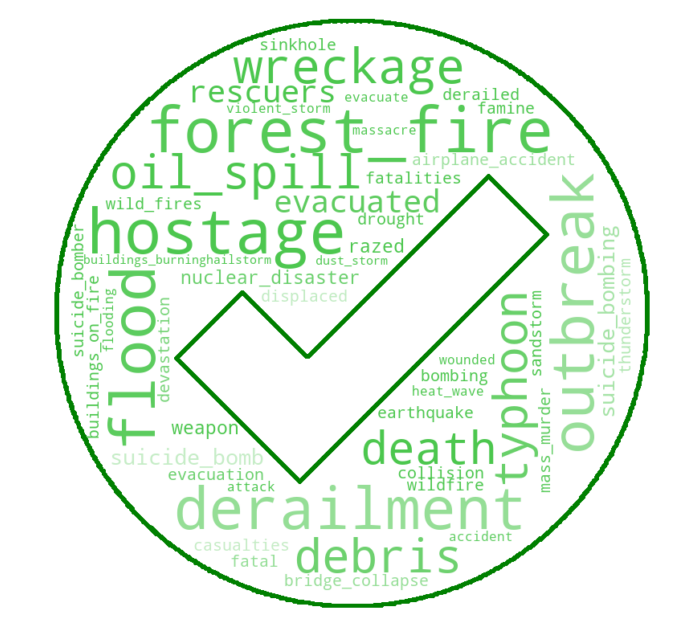

In [12]:
text1 = dfK.where(dfK.target == 1).dropna(how='all').keyword.str.cat(sep=' ')

# Create the wordcloud object
mascara = np.array(Image.open('../verdadero.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
   ##font_path = '/usr/share/fonts/truetype/tlwg/Laksaman.ttf',
    mask=mascara,
    ##stopwords=stopw,
    max_words=50,
    min_font_size=10,
    max_font_size=100, 
    #random_state=42,
    width=1920, 
    height=1080,
    contour_width=8,
    contour_color='green',
    collocations=False
).generate(text1)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

> #### Creamos un grafico para ver las keyword mas frecuentes en el universo de Tweet falsos

<Figure size 432x288 with 0 Axes>

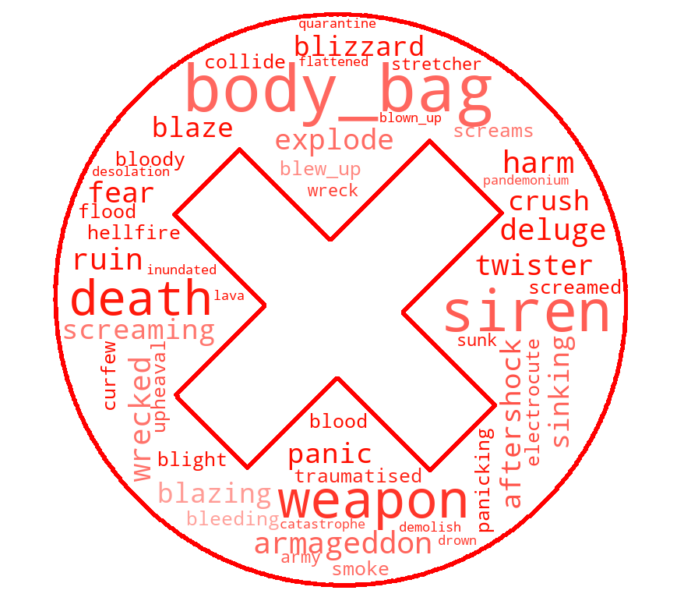

In [13]:
text2 = dfK.where(dfK.target == 0).dropna(how='all').keyword.str.cat(sep=' ')

# Create the wordcloud object
mascara = np.array(Image.open('../falso.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
   ##font_path = '/usr/share/fonts/truetype/tlwg/Laksaman.ttf',
    mask=mascara,
    ##stopwords=stopw,
    max_words=50,
    min_font_size=10,
    max_font_size=100, 
    #random_state=42,
    width=1920, 
    height=1080,
    contour_width=8,
    contour_color='red',
    collocations=False
).generate(text2)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

> #### Investigamos las keyword <b>Comunes</b> entre los tweets verdaderos y falsos

In [55]:
arrTrue = dfK.where(dfK.target == 1).dropna(how='all').keyword.value_counts()
dfTrue = pd.DataFrame({'keyword': arrTrue.index, 'cant_verdaderos': arrTrue.values})

arrFalse = dfK.where(dfK.target == 0).dropna(how='all').keyword.value_counts()
dfFalse = pd.DataFrame({'keyword': arrFalse.index, 'cant_falsos': arrFalse.values})

dfJoin = pd.merge(dfTrue, dfFalse, how='inner', on='keyword')
dfJoin.head(5)

,keyword,cant_verdaderos,cant_falsos
0,outbreak,39,1
1,oil_spill,37,1
2,typhoon,37,1
3,suicide_bomb,32,3
4,suicide_bombing,32,1


In [56]:
dfJoin.shape

(217, 3)

> #### Analizamos las keyword mas frecuentes comunes

In [58]:
dfJoin['cant_total'] = dfJoin.cant_verdaderos + dfJoin.cant_falsos

,keyword,cant_verdaderos,cant_falsos,cant_total
34,fatalities,26,19,45
167,armageddon,5,37,42
161,deluge,6,36,42
211,body_bags,1,40,41
189,harm,4,37,41
145,sinking,8,33,41
69,damage,19,22,41
185,twister,5,35,40
88,windstorm,16,24,40
51,collided,23,17,40


Text(0, 0.5, 'Keyword')

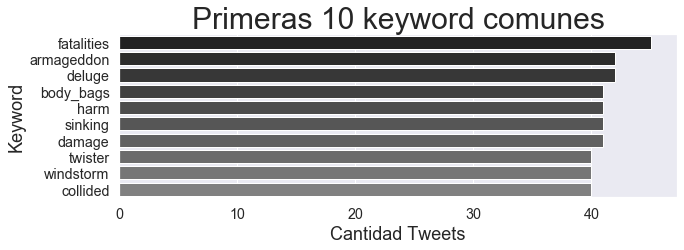

In [166]:
#s = dfK.keyword.value_counts()
p = dfJoin.sort_values(by=['cant_total'], ascending=False).head(10)
#p = pd.DataFrame({'keyword': s.index, 'cant': s.values })

plt.figure(figsize=(10, 3))
sns.set(font_scale = 1.3)
g = sns.barplot(x='cant_total', y='keyword', data=p, orient="h", palette=sns.dark_palette("gray", 10))
g.set_title("Primeras 10 keyword comunes", fontsize=30)
g.set_xlabel("Cantidad Tweets", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)
#show_values_on_bars(g, "h")

In [116]:
dfJoin.head(10)

,keyword,cant_verdaderos,cant_falsos,cant_total
0,outbreak,39,1,40
1,oil_spill,37,1,38
2,typhoon,37,1,38
3,suicide_bomb,32,3,35
4,suicide_bombing,32,1,33
5,evacuated,32,4,36
6,rescuers,32,3,35
7,razed,31,4,35
8,nuclear_disaster,31,3,34
9,earthquake,30,9,39


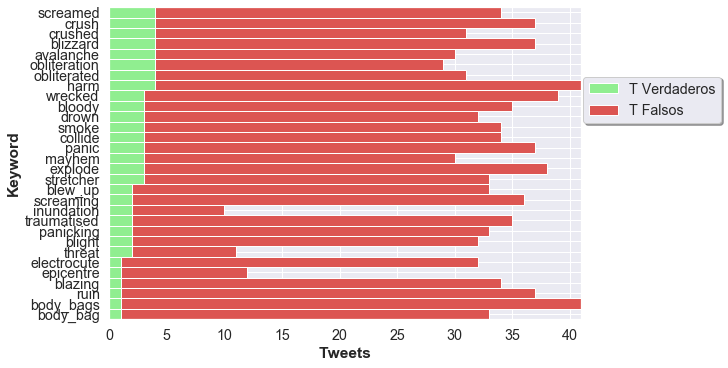

In [167]:
keywords = dfJoin.sort_values(by=['cant_verdaderos']).keyword.values[:30]
cant_verdaderos = dfJoin.sort_values(by=['cant_verdaderos']).cant_verdaderos.values[:30]
cant_falsos = dfJoin.sort_values(by=['cant_verdaderos']).cant_falsos.values[:30]
#keywords, cant_verdaderos, cant_falsos

fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
# Create brown bars
ax.barh(keywords, cant_verdaderos, color='lightgreen', edgecolor='white', height =barWidth, label='T Verdaderos')
# Create green bars (middle), on top of the firs ones
ax.barh(keywords, cant_falsos, left=cant_verdaderos, color='#DC5552', edgecolor='white', height =barWidth, label='T Falsos')
# Create green bars (top)
 
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_ylabel('Keyword',fontweight='bold')

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
#ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
#ax.use_sticky_edges = True
# Custom X axis
#plt.xticks(names, fontweight='bold')
#fig.xlabel("group")
 
# Show graphic
#plt.show()


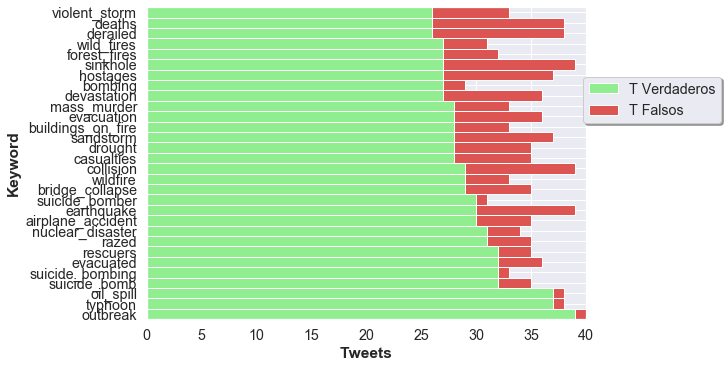

In [168]:
keywords = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False ).keyword.values[:30]
cant_verdaderos = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False).cant_verdaderos.values[:30]
cant_falsos = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False).cant_falsos.values[:30]
#keywords, cant_verdaderos, cant_falsos

fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
# Create brown bars
ax.barh(keywords, cant_verdaderos, color='lightgreen', edgecolor='white', height =barWidth, label='T Verdaderos')
# Create green bars (middle), on top of the firs ones
ax.barh(keywords, cant_falsos, left=cant_verdaderos, color='#DC5552', edgecolor='white', height =barWidth, label='T Falsos')
# Create green bars (top)
 
ax.set_xlabel('Tweets',fontweight='bold')
ax.set_ylabel('Keyword',fontweight='bold')

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
#ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
#ax.use_sticky_edges = True
# Custom X axis
#plt.xticks(names, fontweight='bold')
#fig.xlabel("group")
 
# Show graphic
#plt.show()
